In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('Helrejser Rejsekortet januar 2020.csv', error_bad_lines=False, delimiter=';', na_values = 'nan')

In [3]:
df.shape

(728082, 45)

In [4]:
df = df.dropna()

In [5]:
df.shape

(727850, 45)

In [6]:
time = df.sort_values(['TidsBånd'])

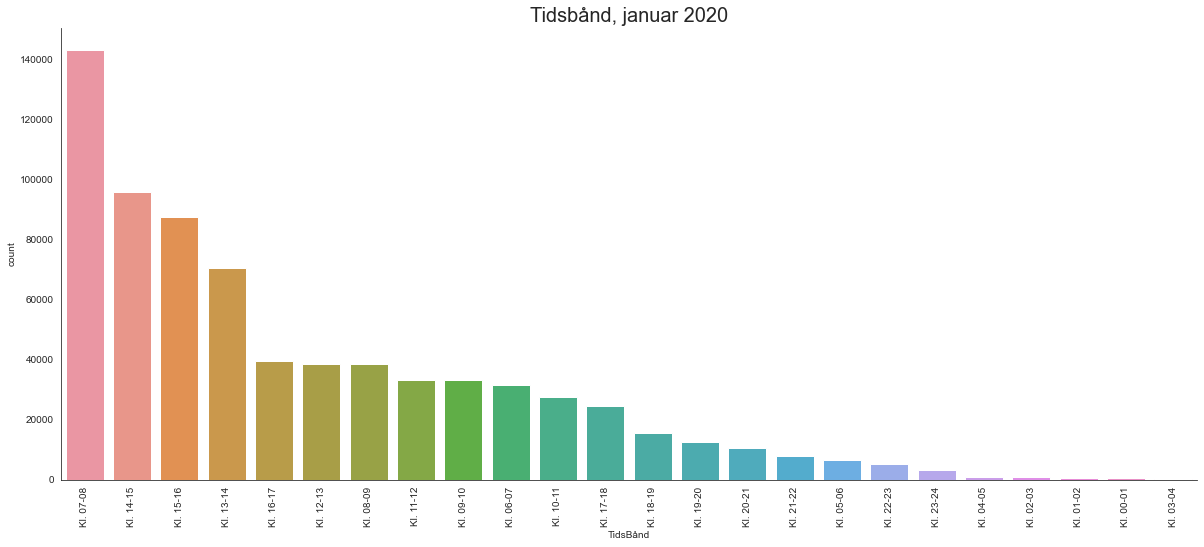

In [27]:
plot = sns.catplot(
            x = 'TidsBånd',
            data = df,
            kind = 'count',
            order = df['TidsBånd'].value_counts().index
            )
plt.title("Tidsbånd, januar 2020", fontsize = 20)
plt.xticks(rotation=90)
plot.fig.set_size_inches(20, 7)

plt.show()

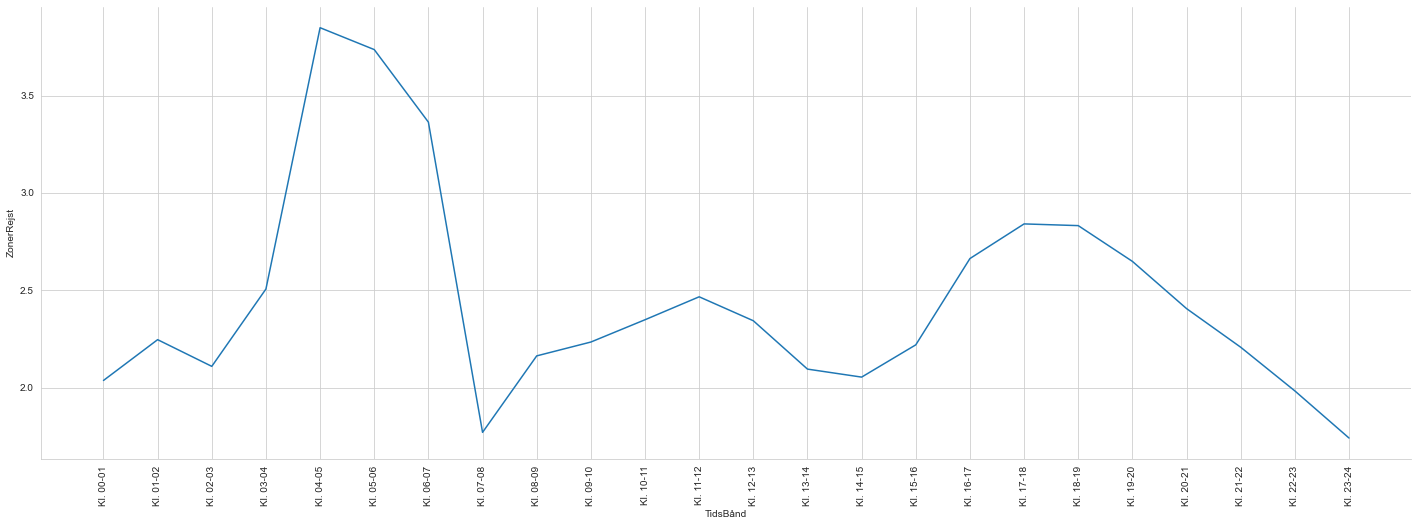

In [8]:
sns.set_style("whitegrid")
plot = sns.relplot(
            x = time['TidsBånd'],
            y = time['ZonerRejst'],
            kind = 'line',
            #style = time['RejseDag'],
            #hue = time['RejseDag'],
            dashes = False,
            ci = None
           )

plt.xticks(rotation=90)
plot.fig.set_size_inches(22, 7)

plt.show()

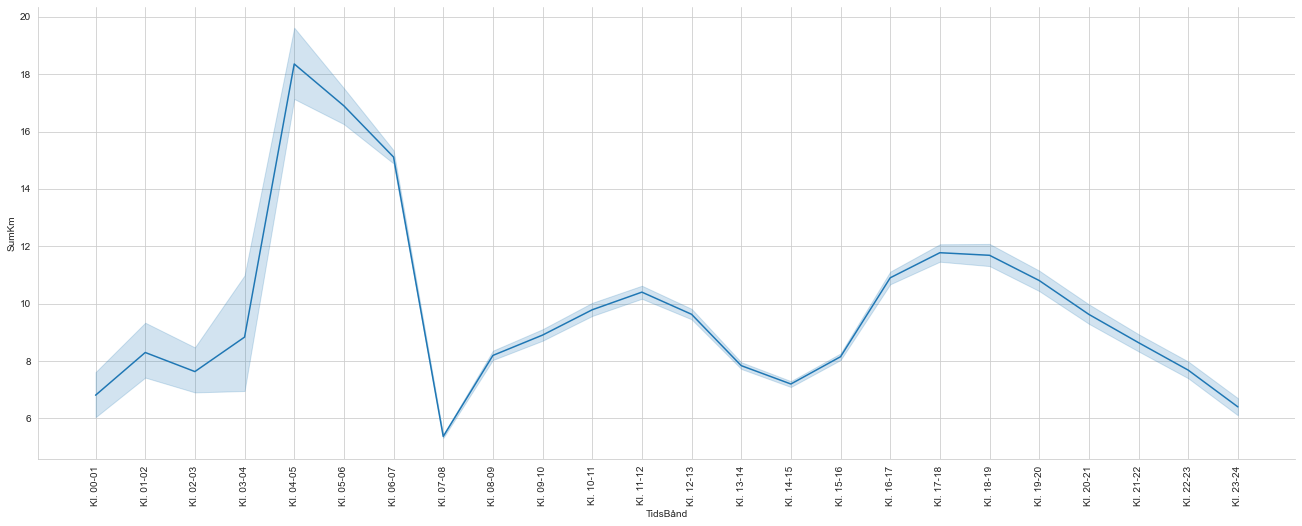

In [9]:
plot = sns.relplot(
            x = time['TidsBånd'],
            y = time['SumKm'],
            kind = 'line',
            markers = True,
            #ci = confidence interval
            #ci = 'sd'
            #ci = None
           )

plt.xticks(rotation=90)
plot.fig.set_size_inches(20, 7)

plt.show()

In [59]:
df2 =df.sort_values(['SumKm'], ascending=[False])

In [65]:
print(df2[['SumKm', 'TidsBånd']][0:30])

        SumKm   TidsBånd
513813    396  Kl. 10-11
378092    374  Kl. 06-07
476736    347  Kl. 14-15
607119    344  Kl. 09-10
149396    331  Kl. 07-08
700433    323  Kl. 15-16
689275    323  Kl. 12-13
615029    322  Kl. 11-12
34660     318  Kl. 06-07
41072     318  Kl. 06-07
520926    315  Kl. 08-09
657379    307  Kl. 10-11
51994     306  Kl. 07-08
47169     304  Kl. 12-13
686879    304  Kl. 12-13
259706    304  Kl. 12-13
701099    303  Kl. 07-08
628930    302  Kl. 16-17
528870    300  Kl. 14-15
513149    298  Kl. 10-11
443898    296  Kl. 09-10
692218    296  Kl. 11-12
476089    294  Kl. 07-08
667308    293  Kl. 08-09
698834    293  Kl. 07-08
667333    293  Kl. 08-09
698810    293  Kl. 07-08
667314    291  Kl. 07-08
667295    291  Kl. 08-09
667313    291  Kl. 08-09


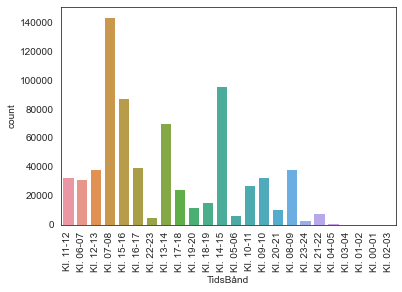

In [68]:
p = sns.countplot(
    x = df['TidsBånd'],
    data = df
)
plt.xticks(rotation=90)
plt.show()

**styles**
* white
* dark
* whitegrid
* darkgrid
* ticks

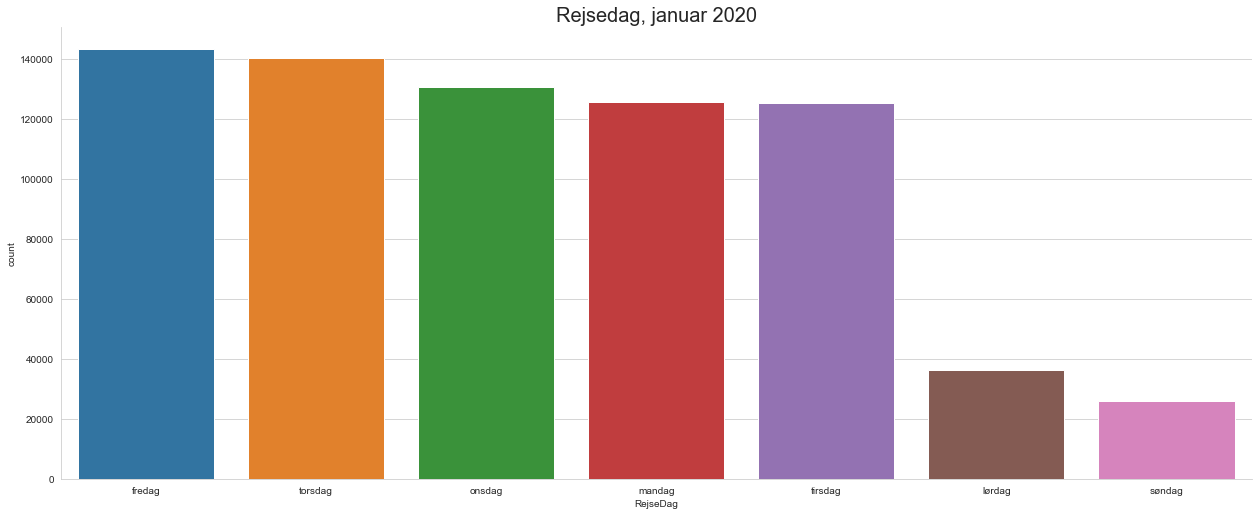

In [10]:
plot = sns.catplot(
            x = 'RejseDag',
            data = df,
            kind = 'count',
            order = df['RejseDag'].value_counts().index
            )
plt.title("Rejsedag, januar 2020", fontsize = 20)
plot.fig.set_size_inches(20, 7)

plt.show()

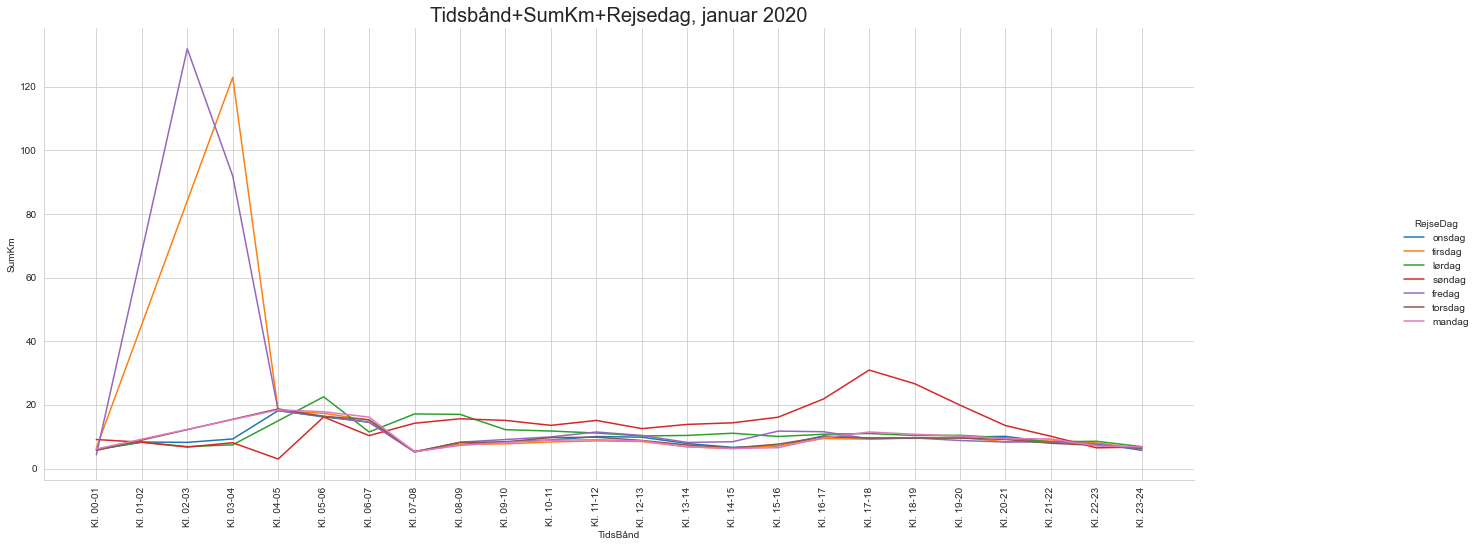

In [11]:
sns.set_style("whitegrid")
plot = sns.relplot(
            x = time['TidsBånd'],
            y = time['SumKm'],
            kind = 'line',
            #style = time['RejseDag'],
            hue = time['RejseDag'],
            dashes = False,
            ci = None
           )
plt.title("Tidsbånd+SumKm+Rejsedag, januar 2020", fontsize = 20)
plt.xticks(rotation=90)
plot.fig.set_size_inches(22, 7)

plt.show()

# Numeric 

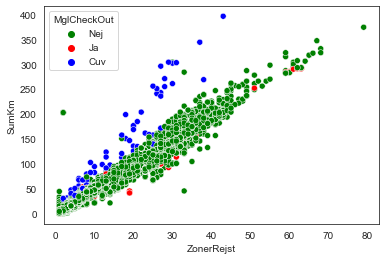

In [20]:
#Do the number of zones travelled extend number of km travelled?
sns.set_style("white")
hue_colors = {"Ja":"red",
              "Nej":"green",
              "Cuv":"blue"}

sns.scatterplot(x = df['ZonerRejst'],
                y = df['SumKm'],
                data = df,
                #subgroup
                hue = df['MglCheckOut'],
                hue_order = ["Nej", "Ja", "Cuv"],
                palette = hue_colors
               )
plt.show()

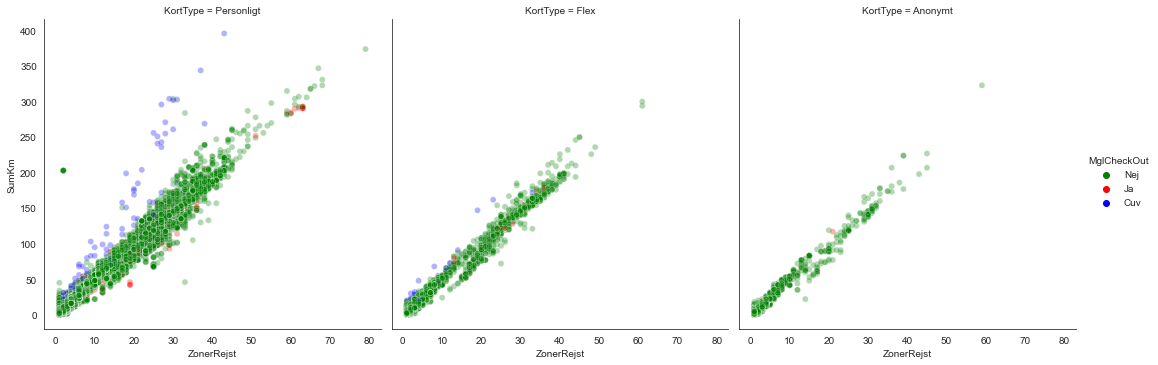

In [70]:
#sns.set_palette('GnBu')
sns.relplot(x = df['ZonerRejst'],
                y = df['SumKm'],
                data = df,
                kind = 'scatter',
                col = df['KortType'],
                #size = "AntalTrafikSelskaber",
                #style = "AntalTrafikSelskaber",
                hue = "MglCheckOut",
                alpha = 0.3,
                palette = hue_colors
               )

plt.show()

#korttype viser, at det anonyme rejsekort oftest bruges til kortere rejser over færre zoner fordelt over færre trafikselskaber

# Categorical - Nominal

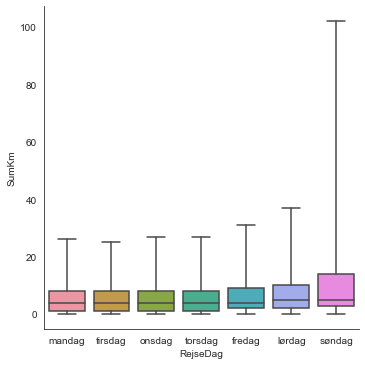

In [21]:
#sns.set_palette('PRGn_r')
sns.set_style("white")
day_order = [
            'mandag',
            'tirsdag',
            'onsdag',
            'torsdag',
            'fredag',
            'lørdag',
            'søndag'
]

sns.catplot(
                x = 'RejseDag',
                y = 'SumKm',
                data = df,
                kind = 'box',
                order = day_order,
                #remove outliers
                sym = "",
                #whiskers set at 5th and 95th percentiles
                whis = [5, 95]
                
)

plt.show()

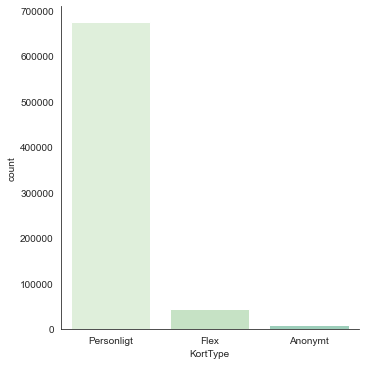

In [22]:
sns.set_style("white")
sns.catplot(
            x = 'KortType', 
            data = df,
            kind = 'count'
            )

plt.show()

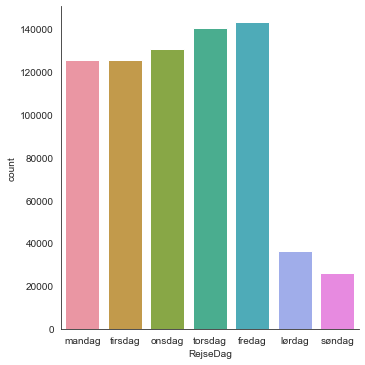

In [23]:
sns.set_style("white")
day_order = [
            'mandag',
            'tirsdag',
            'onsdag',
            'torsdag',
            'fredag',
            'lørdag',
            'søndag'
]

sns.catplot(
            x = 'RejseDag', 
            data = df,
            kind = 'count',
            order = day_order
            )

plt.show()

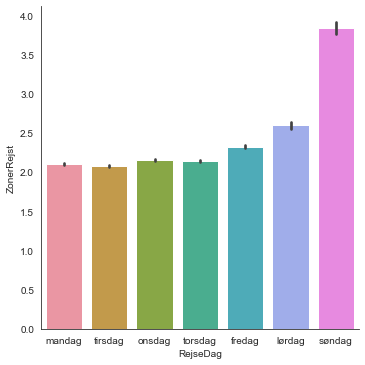

In [24]:
sns.set_style("white")
day_order = [
            'mandag',
            'tirsdag',
            'onsdag',
            'torsdag',
            'fredag',
            'lørdag',
            'søndag'
]

sns.catplot(
            x = 'RejseDag',
            y = 'ZonerRejst',
            data = df,
            kind = 'bar',
            order = day_order,
            #ci = None
            )

plt.show()

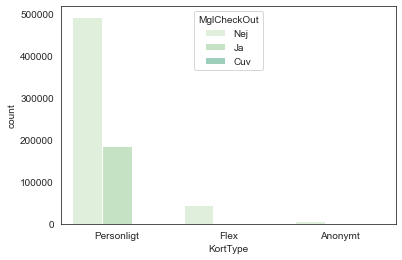

In [25]:
sns.set_style("white")
sns.countplot(x = df['KortType'], data = df, hue = df['MglCheckOut'])
plt.show()

In [ ]:
def newcol

In [ ]:
df.columns

In [ ]:
df2

In [ ]:
### skal kun indeholde de kolonner du skal bruge

In [ ]:
df['SumKm'].mean()

In [ ]:
pd.crosstab(df.TidsBånd, df.Handicap)

In [ ]:
pd.crosstab(df.AntalTrafikSelskaber, df.AntalTrafikSelskaber)

In [ ]:
pd.crosstab(df.ModalKomb, df.ModalKomb)

In [ ]:
sns.countplot(x=df["RejseDag"], data = df)

# Single Plots

# Scatter Plot

# Line Charts